In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x : '%.4f' % x)

import sys
sys.path.append('..')
from src import sp_visualizacion as sv
from src import sp_eda as seda


In [2]:
df = pd.read_excel('../data/datos_limpios.xlsx')

In [3]:
df.head()

,invoiceno,customerid,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit,ship_year,ship_month,ship_day,ship_quarter
0,536365,17850.0000,middle east and north africa,azerbaijan,snacks,online,c,2014-10-08,535113847,2014-10-23,934,15258,9744,14250972,9100896,5150076,2014,10,Thursday,4
1,536365,17850.0000,central america and the caribbean,panama,cosmetics,offline,l,2015-02-22,874708545,2015-02-27,4551,43720,26333,198969720,119841483,79128237,2015,2,Friday,1
2,536365,17850.0000,sub-saharan africa,sao tome and principe,fruits,offline,m,2015-12-09,854349935,2016-01-18,9986,933,692,9316938,6910312,2406626,2016,1,Monday,1
3,536365,17850.0000,sub-saharan africa,sao tome and principe,personal care,online,m,2014-09-17,892836844,2014-10-12,9118,8173,5667,74521414,51671706,22849708,2014,10,Sunday,4
4,536365,17850.0000,central america and the caribbean,belize,household,offline,h,2010-02-04,129280602,2010-03-05,5858,66827,50254,391472566,294387932,97084634,2010,3,Friday,1


In [4]:
df['customerid'] = df['customerid'].astype('Int64')
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')


In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
customerid,46815.0000,15348.1429,12346.0000,13959.0000,15311.0000,16931.0000,18283.0000,1762.6191
order_date,74990,2013-10-13 16:24:15.938125312,2010-01-01 00:00:00,2011-11-25 00:00:00,2013-10-12 00:00:00,2015-09-05 00:00:00,2017-07-28 00:00:00,NaN
order_id,74990.0000,550220168.5816,100008904.0000,325840067.0000,546803557.5000,774941312.5000,999996459.0000,259470829.3237
ship_date,74990,2013-11-07 17:27:19.610614784,2010-01-02 00:00:00,2011-12-21 00:00:00,2013-11-06 00:00:00,2015-09-30 00:00:00,2017-09-16 00:00:00,NaN
units_sold,74990.0000,4998.6207,1.0000,2507.0000,5006.0000,7489.0000,10000.0000,2882.1819
unit_price,74990.0000,26631.4816,933.0000,10928.0000,20570.0000,43720.0000,66827.0000,21683.9361
unit_cost,74990.0000,18757.9065,692.0000,5667.0000,11711.0000,26333.0000,52496.0000,17556.5770
total_revenue,74990.0000,133251852.8380,1866.0000,28025568.7500,78704407.0000,183316329.7500,668069519.0000,146885444.2768
total_cost,74990.0000,93882767.3417,1384.0000,16308270.0000,46424070.5000,120375567.2500,524907504.0000,114965395.7814
total_profit,74990.0000,39369085.4963,482.0000,9631035.0000,28306036.0000,56884864.7500,173870000.0000,37855879.4327


In [6]:
columnas_num = df.select_dtypes(include=np.number).columns.tolist()
lista_eliminar = ['customerid', 'order_id', 'ship_year', 'ship_month', 'ship_quarter']
for col in lista_eliminar:
    columnas_num.remove(col)

In [7]:
df[columnas_num].describe().T

,count,mean,std,min,25%,50%,75%,max
units_sold,74990.0000,4998.6207,2882.1819,1.0000,2507.0000,5006.0000,7489.0000,10000.0000
unit_price,74990.0000,26631.4816,21683.9361,933.0000,10928.0000,20570.0000,43720.0000,66827.0000
unit_cost,74990.0000,18757.9065,17556.5770,692.0000,5667.0000,11711.0000,26333.0000,52496.0000
total_revenue,74990.0000,133251852.8380,146885444.2768,1866.0000,28025568.7500,78704407.0000,183316329.7500,668069519.0000
total_cost,74990.0000,93882767.3417,114965395.7814,1384.0000,16308270.0000,46424070.5000,120375567.2500,524907504.0000
total_profit,74990.0000,39369085.4963,37855879.4327,482.0000,9631035.0000,28306036.0000,56884864.7500,173870000.0000


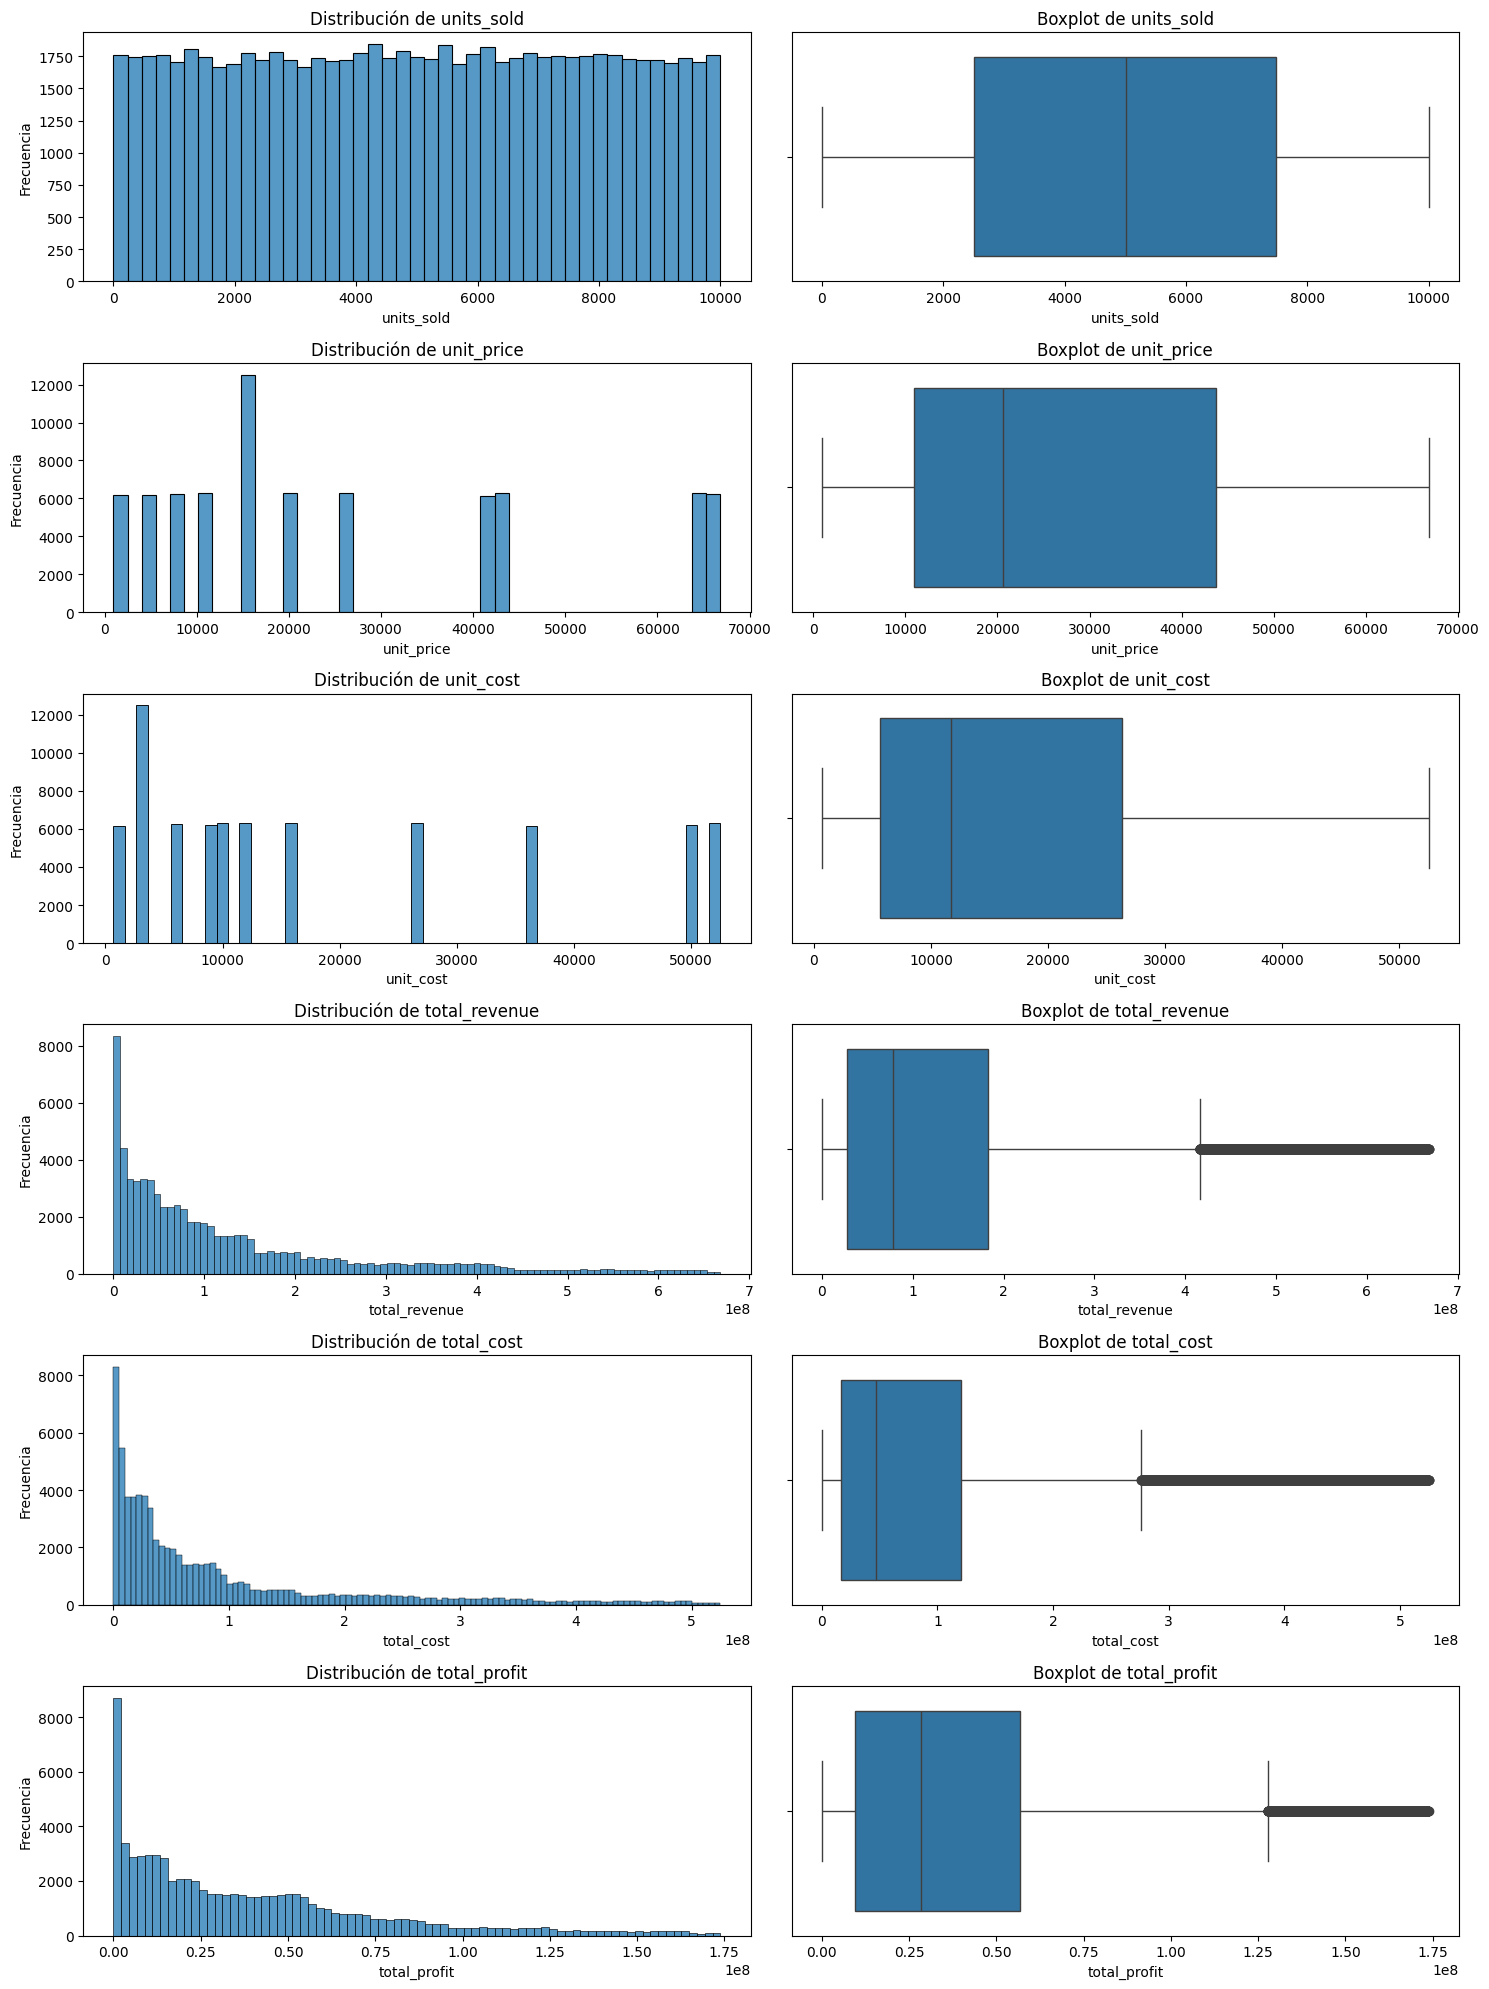

In [8]:
sv.subplot_col_num(df, columnas_num)


In [9]:
dicc_outliers = {'total_revenue': 40000000,
                 'total_cost': 30000000,
                 'total_profit': 12500000}

In [10]:
for col, out in dicc_outliers.items():
    outliers = df[col][df[col] > out].count()
    print(f'Para la columna {col} tenemos {outliers} outliers, lo que un {round(outliers/df.shape[0]*100,2)}% del total de datos.')

Para la columna total_revenue tenemos 50874 outliers, lo que un 67.84% del total de datos.
Para la columna total_cost tenemos 45687 outliers, lo que un 60.92% del total de datos.
Para la columna total_profit tenemos 52378 outliers, lo que un 69.85% del total de datos.


## Gestión nulos de las columnas numéricas

In [11]:
total_nulos, porcentaje_nulos = seda.calcular_nulos(df)

In [12]:
total_nulos

invoiceno             0
customerid        28175
region                0
country               0
item_type             0
sales_channel         0
order_priority        0
order_date            0
order_id              0
ship_date             0
units_sold            0
unit_price            0
unit_cost             0
total_revenue         0
total_cost            0
total_profit          0
ship_year             0
ship_month            0
ship_day              0
ship_quarter          0
dtype: int64

In [13]:
porcentaje_nulos

invoiceno         0.0000
customerid       37.5717
region            0.0000
country           0.0000
item_type         0.0000
sales_channel     0.0000
order_priority    0.0000
order_date        0.0000
order_id          0.0000
ship_date         0.0000
units_sold        0.0000
unit_price        0.0000
unit_cost         0.0000
total_revenue     0.0000
total_cost        0.0000
total_profit      0.0000
ship_year         0.0000
ship_month        0.0000
ship_day          0.0000
ship_quarter      0.0000
dtype: float64

In [14]:
df['customerid'] = df['customerid'].astype(str)
df['customerid'] = df['customerid'].replace('<NA>', 'unknown')


In [15]:
df.sample(5)

,invoiceno,customerid,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit,ship_year,ship_month,ship_day,ship_quarter
72276,542238,12591,sub-saharan africa,the gambia,cosmetics,offline,c,2016-08-27,216106927,2016-09-06,9697,43720,26333,423952840,255351101,168601739,2016,9,Tuesday,3
27549,538566,unknown,australia and oceania,australia,fruits,offline,m,2015-02-12,664771831,2015-03-11,9612,933,692,8967996,6651504,2316492,2015,3,Wednesday,1
42877,540025,17428,europe,russia,fruits,online,m,2017-04-02,283312785,2017-04-29,7404,933,692,6907932,5123568,1784364,2017,4,Saturday,2
43114,540026,unknown,asia,bhutan,office supplies,online,l,2013-10-31,370996129,2013-11-26,4854,65121,52496,316097334,254815584,61281750,2013,11,Tuesday,4
58957,541266,15673,europe,georgia,clothes,offline,m,2015-10-21,581790721,2015-11-03,3658,10928,3584,39974624,13110272,26864352,2015,11,Tuesday,4


## Analizamos la columnas numéricas relacionadas con fechas

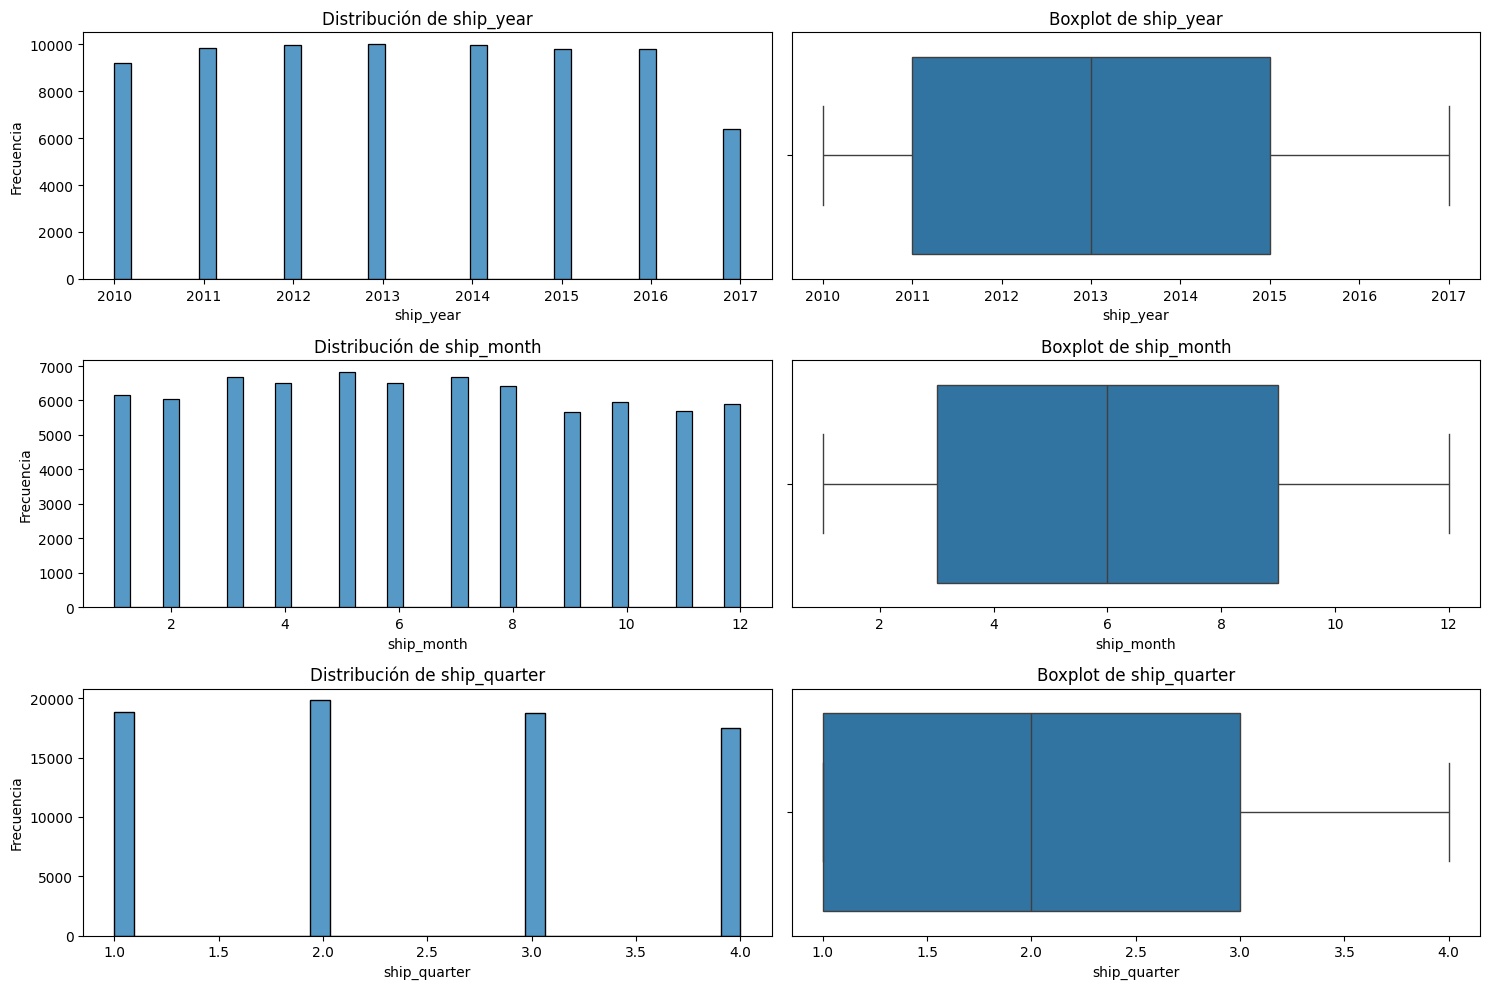

In [16]:
lista_columnas_fecha = ['ship_year', 'ship_month', 'ship_quarter']
sv.subplot_col_num(df, lista_columnas_fecha)

In [17]:
df[lista_columnas_fecha].describe().T

,count,mean,std,min,25%,50%,75%,max
ship_year,74990.0000,2013.3641,2.1958,2010.0000,2011.0000,2013.0000,2015.0000,2017.0000
ship_month,74990.0000,6.3906,3.3952,1.0000,3.0000,6.0000,9.0000,12.0000
ship_quarter,74990.0000,2.4660,1.1041,1.0000,1.0000,2.0000,3.0000,4.0000


In [18]:
df.to_excel('../data/datos_finales.xlsx', index=False)